# Scatterplot Matrices & Heatmap

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix  
import seaborn as sns
import altair as alt

In [2]:
#Switch to Jupyter Notebook mode of matplotlib (pandas is using matplotlib for the scatterplot matrix)
%matplotlib inline  

sns.set(style="ticks") # use ticks on plot axes

# Starting with altair v4, enabling a notebook renderer is no longer necessary: alt.renderers.enable('notebook') 
alt.__version__

'4.1.0'

## Dataset  

In [3]:
# Load the pokemon dataset
df_data = pd.read_csv('./pokemon.csv')
# More infomation about the dataset: https://www.kaggle.com/rounakbanik/pokemon

In [4]:
# Inspect the dataset 
# See https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
df_data.dtypes # No semicolon to see the output in the notebook

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [5]:
# Take a glimpse into the data
df_data.head() # No semicolon to see the output in the notebook

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Hint: Pandas offers [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function to filter out missing data.

## Task: Scatterplot Matrix
### Simple Scatterplot Matrix
Select more than two attributes that are suitable and create a scatterplot matrix (e.g., with [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html) or [altair](https://altair-viz.github.io/gallery/scatter_matrix.html)).

<AxesSubplot:title={'center':'Comparing speed with attacking power of pokemon of different generations'}, xlabel='speed', ylabel='attack'>

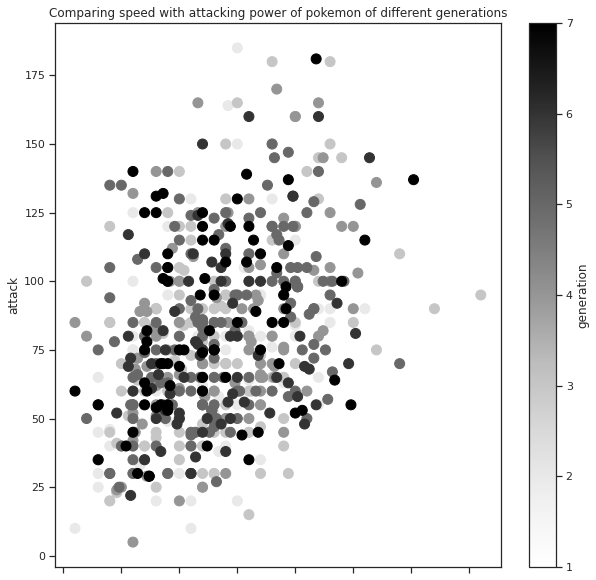

In [127]:
# TODO
df_data.plot(x='speed',y='attack',kind='scatter', c='generation', s= 100, figsize=(10,10), title='Comparing speed with attacking power of pokemon of different generations')


### Colored Scatterplot Matrix
Select a categorical attribute and encode its values with color in the scatterplot matrix (e.g. with [altair](https://altair-viz.github.io/gallery/scatter_matrix.html) again or [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)).

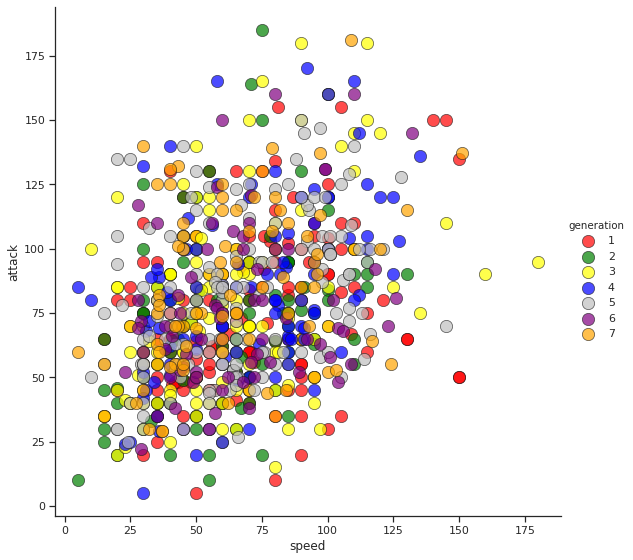

In [128]:
sns.pairplot(data=df_data, x_vars='speed', y_vars='attack', kind='scatter', hue='generation', height=8, plot_kws=
                 {
    "s":150,
    "alpha":0.7,
    'lw':0.5,
    'edgecolor':'k'
    }, palette= ['red','green','yellow','blue','silver','purple','orange'])

### Interpretation

To the content:<br>
There seems to be a positive correlation between the speed and the power of the attack: The faster one pokemon is the fataler the attack is. Furthermore, you get an first assumption by looking at the generations. A few third generation pokemon are very fast but the attack damage is not that huge that it would fit in the positive correlation neatly. Besides that, there are some second generation pokemon which seem to be slower and weeker than most pokemon of other generations. Hoewever, you can observe, that there aren't extreme difference between the pokemon of different generations (in speed and attacking power). <br>
To the visualization: <br>
In this case the colored scatter matrix is better because we want to apply a third categorical attribute. For categorical attributes colour is better than a bar which encodes the brightness in a continuous way. Moreover, you can better distinguish the attribute features of the third attributes by colour than by brightness in the scatter plot. 

## Task: Heat Map
Select suitable attributes and visualise the data in a heatmap, e.g. with [seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) or [altair](https://altair-viz.github.io/gallery/simple_heatmap.html).

The Heat Map:


<AxesSubplot:>

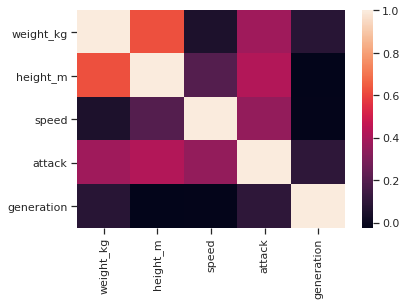

In [129]:
print('The Heat Map:')
selected_data = df_data[['weight_kg','height_m','speed', 'attack', 'generation']]
corre = selected_data.corr()
sns.heatmap(data=corre)

Heat Map with double values or values not needed chancelled out:
This makes interpretation and an overview easier.


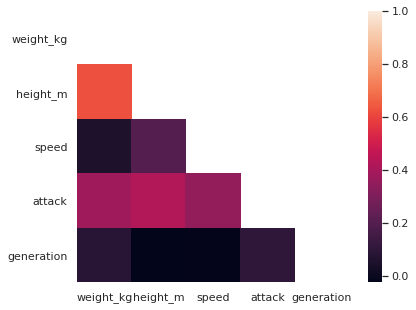

In [132]:
# You can ignore this box
print('Heat Map with double values or values not needed chancelled out:')
print('This makes interpretation and an overview easier.')
import matplotlib.pyplot as plt
mask = np.zeros_like(corre)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corre, mask=mask, vmax=1, square=True)

### Interpretation

Weight and height are positive correlated with each other. No or at most little correlation are between the pairs weight-speed, height-generation, speed-generation. Furthermore, the attacking power seems to depend on the weight, height and speed. The stronger the pokemon's attack the more it weights and the taller and the faster it is.<br><br>
Conclusion:<br> A Heat Map is good to show correlations between single attributes. Besides that, the Heap Map with white unfilled fields makes interpretation easier because there aren't correlations of the same twice and also no autocorrelations any longer.

## Submission

Please add your student information (name,student ID) and download this notebook as HTML (File > Export Notebook As... > Export Notebook to HTML) and submit it.